# Lab 5 - Polynomial Interpolation and Error
## February 27 - March 1, 2023
## Student 1 Name: Dhruv Shah Student 1 ID No: 202103017
## Student 2 Name: Pranav Patel Student 2 ID No: 202103040
## Student 3 Name: Vatsal Shah Student 3 ID No: 202103022
## Date of Submission: $\underline{02/03/23}$

In [137]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt
import math

### Q.1 Write a function `mychebynodes` that takes in $n$, the number of points to be interpolated between $[-,1,1]$, and outputs the points $z_k = \left(\frac{2k+1}{2n}\right)\pi,k=0,\ldots,n-1$. For interpolating a given function $f$, use samples $\{(z_k,f(z_k)),k=0,\ldots,n-1\}$ for Lagrange/Newton's polynomial interpolating methods. These points are called *Chebyshev Nodes*.

In [138]:
# Some basic utility functions

# Function that will take an function parameter and range[a, b] and it will plot the graph using plt.plot
def plotfx(fx, a, b):
  xn = np.linspace(a, b, 1000)
  yn = fx(xn)
  plt.plot(xn, yn)
  # return yn

# mynewtonint function

def evalPn(x, coeff, xy): #method that evaluate the polynomial with the basis 1, (x-x0), (x-x0)(x-1),...
  eval = 0
  for i in range(len(coeff)):
    eval = eval + coeff[i] * wk(x, i, xy)
  return eval


def wk(x, k, xy): #This function computes the values W_k(x)
  wi = 1
  for i in range(k):
    wi = wi * (x - xy[i][0])

  return wi

def kPn(x, coeff, xy): # This function computes the value of P^(k-1)(x)
  evaPol = 0
  k = len(coeff)
  for i in range(k):
    evaPol += coeff[i] * wk(x, i, xy)
    
  return evaPol

#Given a n x 2 matrix it will find the coefficient of the polynomial which passes through the points given in the matrix
def mynewtonint(xy):
  coeff = []

  for i in range(len(xy)):
    xi = xy[i][0]
    yi = xy[i][1]
    denom = wk(xi, i, xy)
    term = (yi - kPn(xi, coeff, xy))/denom
    # print(i, w)
    coeff = np.append(coeff, term)
    # coeff[1] = np.append(coeff[1], denom)
  return coeff
  # return np.array(coeff).transpose()

#Given a vector of coefficient and n x 2 matrix of sample point the function will plot the graph ot the polynomial whose cofficients are given in function argument
def plotPn(coeff, xy):
  samplex0 = np.array(xy[  : ,0])
  sampley0 = np.array(xy[  : ,1])
  a = np.min(samplex0)
  b = np.max(samplex0)

  xn = np.linspace(a, b, 100)
  fx = evalPn(xn, coeff, xy)

  plt.scatter(samplex0, sampley0, marker='o')
  plt.plot(xn, fx, color='r')
  plt.show()

In [139]:
###  Chebyshev Nodes
### def mychebynodes(n):
###  Chebyshev Nodes
def fx(x):
  return np.exp(x)
fx = np.vectorize(fx)

def mychebynodes(n):
  xk = np.array([])
  for k in range(n):
    zk = ((2*k + 1)/(2*n))*np.pi
    xk = np.append(xk, np.cos(zk))
  
  return xk

In [140]:
print(mychebynodes(8))

[ 0.98078528  0.83146961  0.55557023  0.19509032 -0.19509032 -0.55557023
 -0.83146961 -0.98078528]


### Q.1(a) Plot $w^{chebyshev}_n(x) = \prod_{k=0}^{n-1}(x-z_k)$ against $x$ at several samples (approx. $1000$) in the interval $[-1,1]$, for a few different values of $n$. Compare with $w_n(x) = \prod_{k=0}^{n}(x-x_k)$ where $x_k$ are uniformly sampled points in the interval $[-1,1]$. Record your observations.

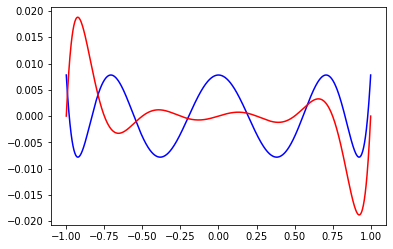

In [141]:
### Compare w_chebyshev against w_n.
def w(x, n, xy):
  wi = 1
  for i in range(n):
    wi = wi * (x - xy[i][0])
  return wi


n = 8
## Generating Chebyshev Nodes and finding the interpolating curve
xpointsC = mychebynodes(n)
ypointsC = fx(xpointsC)
xyC = np.column_stack((xpointsC, ypointsC))

polC = mynewtonint(xyC)


xpoints = np.linspace(-1, 1, n + 1)
ypoints = fx(xpoints)
xy = np.column_stack((xpoints, ypoints))

xn = np.linspace(-1, 1, 1000) #Uniformly sampled 1000 points.
ynC = w(xn , n, xyC)
plt.plot(xn , ynC, color = 'b') # w(x) using Chebyshev nodes.

yn = w(xn, n + 1, xy)
plt.plot(xn, yn, color = 'r') # w(x) using uniform sampling.

### <font color="red"> Ans 1. Write your observations here <font>
### Here as the Chebyshev nodes are not uniformly sampled, we can see the difference between the values of $w_n({x})$ in the plot.

***
### Q.2: Compare the interpolation error using either Lagrange or Newton's method for the functions $f_1(x)=\frac{1}{1+25x^2}, x \in [-1,1]$ and $f_2(x) = \sqrt{x},x\in [0,4]$ using uniformly sampled $n$ points in $[-1,1]$ and $[0,4]$ resp., with that obtained via Chebyshev nodes for a few different values of $n$. Plot the actual function, the interpolating polynomials, and the errors. Record your obsevations.

In [142]:
### Examples 
def f1(x):
    return 1/(1+25*x**2)

def f2(x):
    return np.sqrt(x)

In [143]:
# f(x) = 1/(1+25x^2), f(x) = sqrt{x}
# Generating the Chebyshev nodes and finding  the interpolating polynomial.

# Used the Newton's interpolation method on the Chebyshev nodes on the function f1(x)
n = 20
x1Cheby = mychebynodes(n)
y1Cheby = f1(x1Cheby)
xyC1 = np.column_stack((x1Cheby, y1Cheby))
polyCheby1 = mynewtonint(xyC1)

x1Nor = np.linspace(-1,1,n+1)
y1Nor = f1(x1Nor)
xyNor1 = np.column_stack((x1Nor, y1Nor))
polyNor1 = mynewtonint(xyNor1)

In [144]:
def plotTwofn(poly, xy, fx, a, b):
    xn = np.linspace(a,b,1000)
    yn = fx(xn)
    plt.plot(xn, yn)
    plotPn(poly, xy)

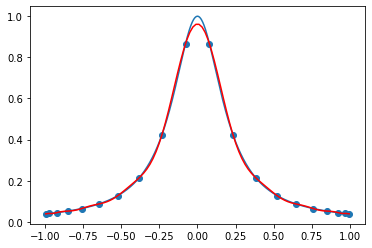

In [145]:
plotTwofn(polyCheby1, xyC1, f1, -1,1) # Using Chebyshev nodes.

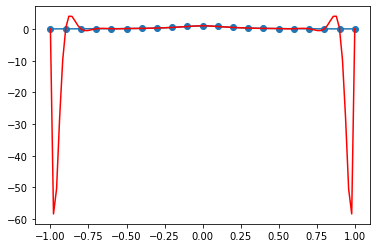

In [146]:
plotTwofn(polyNor1, xyNor1, f1, -1,1) # Using equisampled nodes.

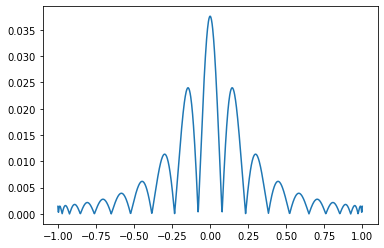

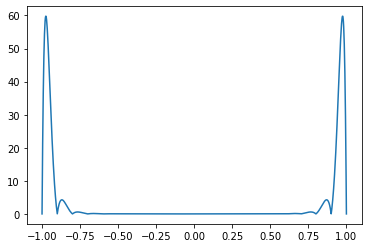

In [147]:
def error(x, f, coeff, xy):
  e_x = f(x) - evalPn(x, coeff, xy)
  return np.abs(e_x)

# Plotting the error function for f1
xn = np.linspace(-1, 1, 1000)
ynC = error(xn, f1, polyCheby1, xyC1)
plt.plot(xn, ynC)
plt.show()

yn = error(xn, f1, polyNor1, xyNor1)
plt.plot(xn, yn)

In [148]:
def rangeMap(a, b, a1, b1, x):
    # x = np.linspace(a, b, 1000)
    x_new_range = ((x - a) * (b1 - a1) / (b-a)) + a1
    return x_new_range

In [149]:
n = 20
x2Cheby = mychebynodes(n)
x2ChebyMap = rangeMap(-1,1,0,4,x2Cheby)
y2Cheby = f2(x2ChebyMap)
xyC2 = np.column_stack((x2ChebyMap, y2Cheby))
polyCheby2 = mynewtonint(xyC2)

x2Nor = np.linspace(0,4,n+1)
y2Nor = f2(x2Nor)
xyNor2 = np.column_stack((x2Nor, y2Nor))
polyNor2 = mynewtonint(xyNor2)

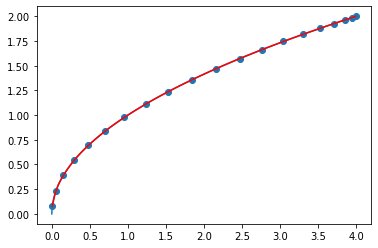

In [150]:
plotTwofn(polyCheby2, xyC2, f2,0,4)

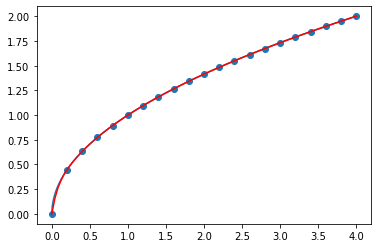

In [151]:
plotTwofn(polyNor2, xyNor2, f2, 0,4)

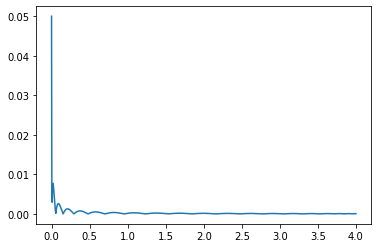

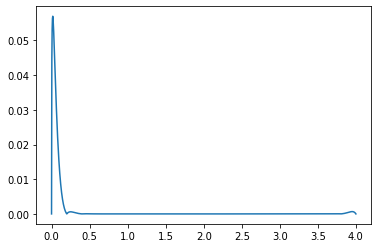

In [152]:
# Plotting the error function for f2
xn = np.linspace(0, 4, 1000)
ynC = error(xn, f2, polyCheby2, xyC2)
plt.plot(xn, ynC)
plt.show()

yn = error(xn, f2, polyNor2, xyNor2)
plt.plot(xn, yn)

### <font color="red"> Ans 2. Write your observations here <font>
### We observe that for the funtion $f1$ the interpolation error using the Chebyshev nodes is very less as compared to the error obtained using uniform sampling.
### But for $f2$ the error in both the cases is nearly the same.

***
### Q.3. Write a function `mylstsquarepolyfit` that takes in two $n \times 1$ vectors $x$ and $y$, and the degree of the polynomial $m$ (with $m \leq n$), and outputs the coefficient vector of the polynomial of degree atmost $m$ (denoted by $p^m(x)$), that minimizes the least square error $e = \sum_{i=1}^n (y_i - p^m(x_i))^2$.

In [153]:
### Least Square Error
### def mylstsquarepolyfit(x,y,m):
def mylstsquarepolyfit(x,y,m):
    n = len(x)
    pow = np.arange(0, m+1)
    vand = x[:,0:1]**pow
    
    err = np.linalg.lstsq(vand, y, rcond=-1)[0]
    # err = np.linalg.norm(vand.dot(coeff) - y)
    return err

In [154]:
# Here x, y are two nx1 vectors.
x = np.array([[1,2,3,4,5,7]]).T
y = np.array([[5,8,-1,9,16,-8]]).T

# Here we take m=2 and n=6
m=3
lstq = mylstsquarepolyfit(x,y,m)
x_ran = np.linspace(1,7,50).reshape(50,1)

#Convert these 4 lines into a function.
def evalfn(m, lstq, x_ran):
    pow = np.arange(0,m+1)
    vand = x_ran ** pow
    eval = np.dot(vand, lstq)
    return eval

val = evalfn(m, lstq, x_ran)

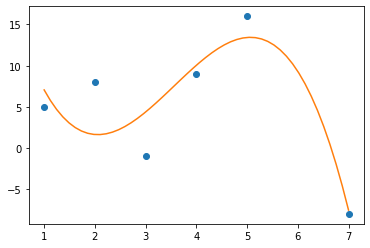

In [155]:
plt.plot(x,y,'o')
plt.plot(x_ran, val)

### Q.3 (a) Plot the least square fit polynomial for the functions $f_1(x) = \frac{1}{1+25x^2}, x \in [-1,1]$ and $f_2(x) = \sqrt{x}, x \in [0,4]$ for different values of $m$ and $n$, and for points obtained using uniform samples and that obtained via sampling at Chebyshev nodes. Find the corresponding error and record your observations.

In [156]:
### Examples 
def f1(x):
    return 1/(1+25*x**2)

def f2(x):
    return np.sqrt(x)

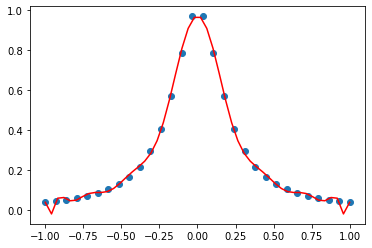

In [157]:
m1 = 16
x1 = np.linspace(-1,1,30).reshape(30,1)
y1 = f1(x1)

lstq1 = mylstsquarepolyfit(x1,y1,m1)
x_ran1 = np.linspace(-1,1,50).reshape(50,1)
val1 = evalfn(m1,lstq1, x_ran1)

# Plot the function samples and the function obtained.
plt.plot(x1, y1, 'o')
plt.plot(x_ran1, val1, color='r')

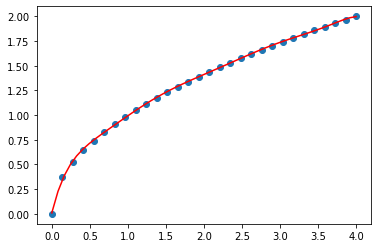

In [158]:
m2 = 8
x2 = np.linspace(0,4,30).reshape(30,1)
y2 = f2(x2)
lstq2 = mylstsquarepolyfit(x2,y2,m2)
x_ran2 = np.linspace(0,4,50).reshape(50,1)
val2 = evalfn(m2,lstq2,x_ran2)


plt.plot(x2, y2, 'o')
plt.plot(x_ran2, val2, color='r')

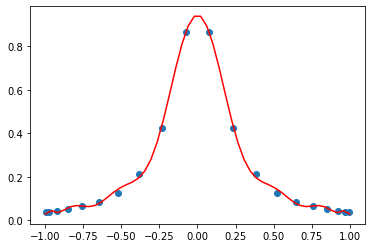

In [159]:

mC1 = 15
# print(x1Cheby.shape)

lstqCheby1 = mylstsquarepolyfit(x1Cheby.reshape(20, 1), y1Cheby, mC1)

val1C = evalfn(mC1, lstqCheby1, x_ran1)


plt.plot(x1Cheby, y1Cheby, 'o')
plt.plot(x_ran1, val1C, color='r')


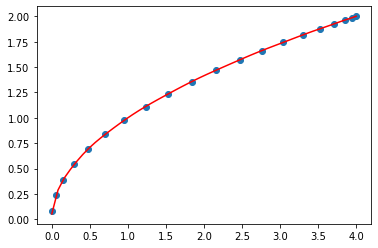

In [160]:

mC2 = 15
# print(x1Cheby.shape)

lstqCheby2 = mylstsquarepolyfit(x2ChebyMap.reshape(20, 1), y2Cheby, mC2)

val2C = evalfn(mC2, lstqCheby2, x_ran2)


plt.plot(x2ChebyMap, y2Cheby, 'o')
plt.plot(x_ran2, val2C, color='r')


### <font color="red"> Ans 3. Write your observations here <font>
###  
###
###
    